In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [3]:
# import trip data
df = pd.read_csv('data/citibike_ZIP.csv')
df.shape

(1863447, 20)

In [4]:
# convert to geo dataframe
start_gpd = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(
    df['start_lon'], df['start_lat']), crs = 'epsg:4326')

# update projection 
start_gpd.to_crs(epsg=2263, inplace = True)

In [5]:
# import zipcode shapefile
zip_shp = gpd.read_file('nyc_zip/ZIP_CODE_040114.shp')[['ZIPCODE', 'geometry']]

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [6]:
start_count = df.groupby(['start_id'], as_index=False)['bikeid'].count()
start_count.columns = ['start_id','start_count']
start_count.head()

,start_id,start_count
0,72,5507
1,79,1521
2,82,1177
3,83,2342
4,116,4271


In [7]:
# drop duplicates for plotting
gpd_sub = start_gpd.drop_duplicates(['start_id'])
gpd_sub.shape

(958, 20)

In [10]:
gpd_sub = gpd_sub.merge(start_count,
                       on = 'start_id',
                       how = 'left')

(177056.3741482713, 247352.82091151498)

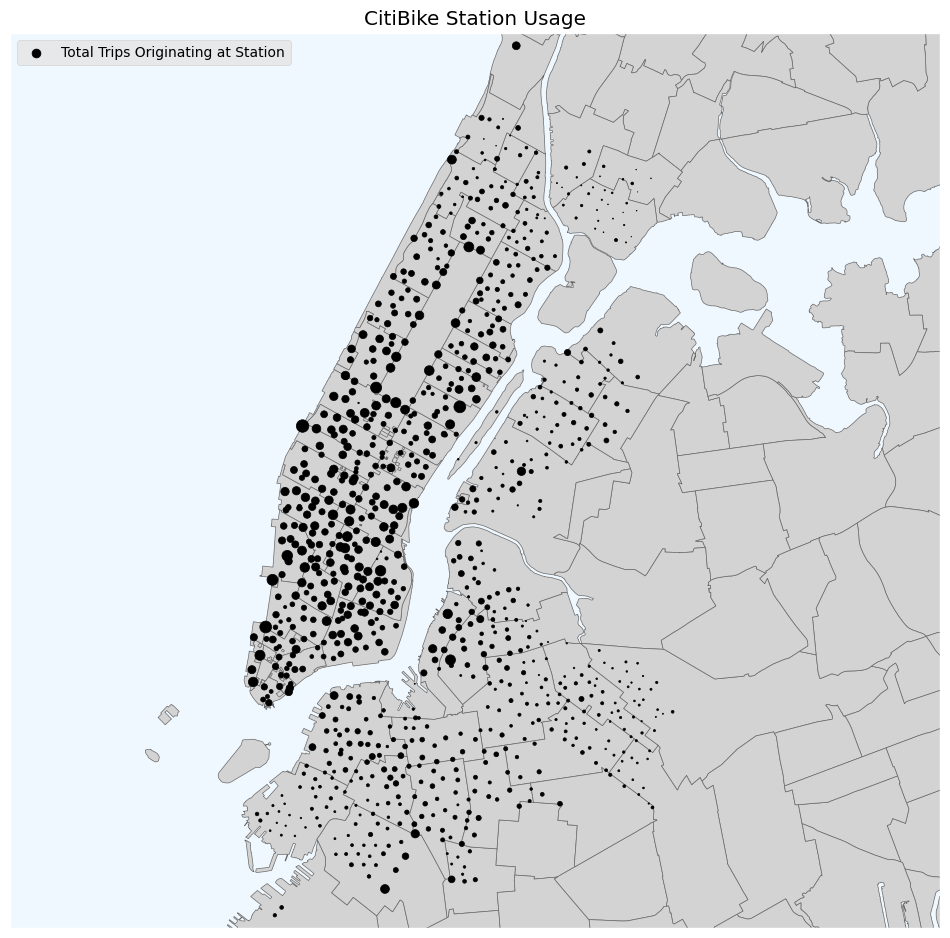

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_facecolor("aliceblue")
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
#zip_shp.plot(ax=ax, color='lightgrey', edgecolor = 'silver')
zip_shp.plot(ax=ax, color='lightgrey', edgecolor = 'dimgray')
gpd_sub.plot(ax=ax, markersize= gpd_sub['start_count']/150, color = 'black', legend = True)

ax.legend(['Total Trips Originating at Station'],loc='upper left')
plt.title('CitiBike Station Usage')

minx, miny, maxx, maxy = start_gpd.total_bounds
ax.set_xlim(minx - 19000, maxx + 21000)
ax.set_ylim(miny - 1000, maxy + 1000)